In [1]:
from pysenal.io import *
from datagrand_ie_2019.utils.constant import *


## build vocab of corpus.txt for ELMO training

In [17]:
counter = {}
for line in read_lines_lazy(RAW_DATA_DIR+'corpus.txt'):
    tokens = line.split('_')
    for token in tokens:
        if token not in counter:
            counter[token] = 1
        else:
            counter[token] += 1
sorted_chars = sorted(counter,key=lambda i:counter[i],reverse=True)
sorted_chars = ['<S>','</S>','<UNK>'] + sorted_chars
write_lines(DATA_DIR+'corpus_vocab.txt', sorted_chars)
sum(counter.values())

93245582

# count entity count and length distribution

In [22]:
from collections import Counter
a_lens = []
b_lens = []
c_lens = []
for item in read_json(TRAINING_FILE):
    for e in item['entities']:
        e_len = e['end'] - e['start']
        if e['type'] == 'a':
            a_lens.append(e_len)
        elif e['type'] == 'b':
            b_lens.append(e_len)
        elif e['type'] == 'c':
            c_lens.append(e_len)

a_len_counter = Counter(a_lens)            
b_len_counter = Counter(b_lens)            
c_len_counter = Counter(c_lens)            


In [23]:
len(a_lens)

9281

In [24]:
len(b_lens)

14704

In [25]:
len(c_lens)

9097

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 23 artists>

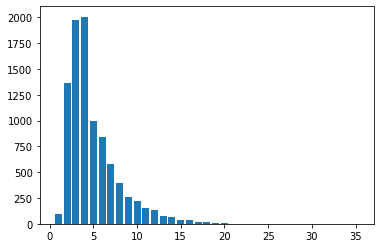

In [6]:
plt.bar(a_len_counter.keys(), a_len_counter.values())

<BarContainer object of 19 artists>

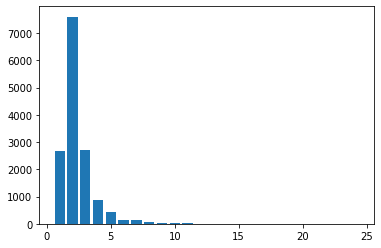

In [26]:
plt.bar(b_len_counter.keys(), b_len_counter.values())

<BarContainer object of 15 artists>

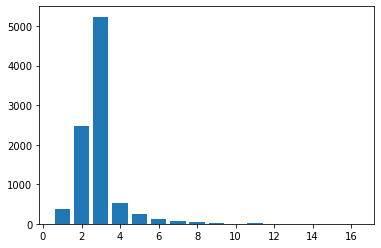

In [27]:
plt.bar(c_len_counter.keys(), c_len_counter.values())

In [15]:
for line in read_lines_lazy(RAW_DATA_DIR + 'train.txt'):
    segments = line.split('  ')
    is_hit = False
    for prev_segment, segment in zip(segments[:-1],segments[1:]):
        if prev_segment[-1] == segment[-1]:
            print(line)
            is_hit = True
            break
    if is_hit:
        break

4246_12299_1856/a  20451_17964/a  6255_10690_19311_13862_20958_1530_5797_6754_14790_17225_6102_6484_2034_16374_11221_7105_9267_16046/o


In [29]:
max_len = -1
for sent in read_json(TRAINING_FILE):
    sent_len = len(sent['tokens'])
    if sent_len > max_len:
        max_len = sent_len
max_len        

566